In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#import the citipy module 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccc86899c384315fd0735dc4a85854e1


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | odweyne
Processing Record 2 of Set 13 | ostrovnoy
Processing Record 3 of Set 13 | port blair
Processing Record 4 of Set 13 | palmares do sul
Processing Record 5 of Set 13 | strezhevoy
Processing Record 6 of Set 13 | port alfred
Processing Record 7 of Set 13 | huarmey
Processing Record 8 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 13 | port elizabeth
Processing Record 10 of Set 13 | dudinka
Processing Record 11 of Set 13 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 13 | pevek
Processing Record 13 of Set 13 | clyde river
Processing Record 14 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 13 | codrington
Processing Record 16 of Set 13 | mar del plata
Processing Record 17 of Set 13 | east london
Processing Record 18 of Set 13 | gisborne
Processing Record 19 of Set 13 | constitucion
Processing Record 20 of Set 13 | warrnambool
Processing Record 21 of Set 13 | walv

Processing Record 38 of Set 16 | skelleftea
Processing Record 39 of Set 16 | vallenar
Processing Record 40 of Set 16 | tanete
Processing Record 41 of Set 16 | chilia veche
Processing Record 42 of Set 16 | ciudad bolivar
Processing Record 43 of Set 16 | maningrida
Processing Record 44 of Set 16 | alofi
Processing Record 45 of Set 16 | nizhneudinsk
Processing Record 46 of Set 16 | jacareacanga
Processing Record 47 of Set 16 | najran
Processing Record 48 of Set 16 | olinda
Processing Record 49 of Set 16 | huilong
Processing Record 50 of Set 16 | ndele
Processing Record 1 of Set 17 | alice springs
Processing Record 2 of Set 17 | palencia
Processing Record 3 of Set 17 | longyearbyen
Processing Record 4 of Set 17 | borgarnes
Processing Record 5 of Set 17 | torbay
Processing Record 6 of Set 17 | asyut
Processing Record 7 of Set 17 | maracaibo
Processing Record 8 of Set 17 | villazon
Processing Record 9 of Set 17 | san patricio
Processing Record 10 of Set 17 | kahului
Processing Record 11 of S

Processing Record 20 of Set 20 | patacamaya
Processing Record 21 of Set 20 | kodinsk
Processing Record 22 of Set 20 | varkaus
Processing Record 23 of Set 20 | bubaque
Processing Record 24 of Set 20 | marystown
Processing Record 25 of Set 20 | wulanhaote
City not found. Skipping...
Processing Record 26 of Set 20 | cidreira
Processing Record 27 of Set 20 | ivanava
Processing Record 28 of Set 20 | goderich
Processing Record 29 of Set 20 | yinchuan
Processing Record 30 of Set 20 | tiznit
Processing Record 31 of Set 20 | luanda
Processing Record 32 of Set 20 | porto santo
Processing Record 33 of Set 20 | manokwari
Processing Record 34 of Set 20 | tateyama
Processing Record 35 of Set 20 | sukhobezvodnoye
Processing Record 36 of Set 20 | estacion coahuila
Processing Record 37 of Set 20 | faya
Processing Record 38 of Set 20 | ternate
Processing Record 39 of Set 20 | zeya
Processing Record 40 of Set 20 | orlik
Processing Record 41 of Set 20 | tabou
Processing Record 42 of Set 20 | matagami
Proc

Processing Record 6 of Set 24 | richards bay
Processing Record 7 of Set 24 | alyangula
Processing Record 8 of Set 24 | challapata
Processing Record 9 of Set 24 | viedma
Processing Record 10 of Set 24 | barra
Processing Record 11 of Set 24 | lobva
Processing Record 12 of Set 24 | cockburn town
Processing Record 13 of Set 24 | barinas
Processing Record 14 of Set 24 | tura
Processing Record 15 of Set 24 | lerwick
Processing Record 16 of Set 24 | vitimskiy
City not found. Skipping...
Processing Record 17 of Set 24 | road town
Processing Record 18 of Set 24 | pangai
Processing Record 19 of Set 24 | anadyr
Processing Record 20 of Set 24 | namatanai
Processing Record 21 of Set 24 | cheuskiny
City not found. Skipping...
Processing Record 22 of Set 24 | rundu
Processing Record 23 of Set 24 | tahta
Processing Record 24 of Set 24 | avera
Processing Record 25 of Set 24 | marfino
Processing Record 26 of Set 24 | nsanje
Processing Record 27 of Set 24 | lipin bor
Processing Record 28 of Set 24 | popo

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Odweyne,9.4092,45.0640,58.87,34,11,5.23,SO,2022-01-30 03:34:03
1,Ostrovnoy,68.0531,39.5131,18.61,92,100,9.60,RU,2022-01-30 03:34:04
2,Port Blair,11.6667,92.7500,80.64,74,75,4.61,IN,2022-01-30 03:34:05
3,Palmares Do Sul,-30.2578,-50.5097,67.59,75,2,6.98,BR,2022-01-30 03:34:05
4,Strezhevoy,60.7333,77.5889,3.18,96,100,6.67,RU,2022-01-30 03:34:05
5,Port Alfred,-33.5906,26.8910,68.76,86,10,8.08,ZA,2022-01-30 03:34:06
6,Huarmey,-10.0681,-78.1522,70.50,84,67,7.90,PE,2022-01-30 03:34:06
7,Port Elizabeth,-33.9180,25.5701,64.69,94,20,4.61,ZA,2022-01-30 03:31:55
8,Dudinka,69.4058,86.1778,-2.38,95,100,12.33,RU,2022-01-30 03:34:07
9,Pevek,69.7008,170.3133,-15.20,98,100,3.96,RU,2022-01-30 03:34:07


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Odweyne,SO,2022-01-30 03:34:03,9.4092,45.0640,58.87,34,11,5.23
1,Ostrovnoy,RU,2022-01-30 03:34:04,68.0531,39.5131,18.61,92,100,9.60
2,Port Blair,IN,2022-01-30 03:34:05,11.6667,92.7500,80.64,74,75,4.61
3,Palmares Do Sul,BR,2022-01-30 03:34:05,-30.2578,-50.5097,67.59,75,2,6.98
4,Strezhevoy,RU,2022-01-30 03:34:05,60.7333,77.5889,3.18,96,100,6.67
5,Port Alfred,ZA,2022-01-30 03:34:06,-33.5906,26.8910,68.76,86,10,8.08
6,Huarmey,PE,2022-01-30 03:34:06,-10.0681,-78.1522,70.50,84,67,7.90
7,Port Elizabeth,ZA,2022-01-30 03:31:55,-33.9180,25.5701,64.69,94,20,4.61
8,Dudinka,RU,2022-01-30 03:34:07,69.4058,86.1778,-2.38,95,100,12.33
9,Pevek,RU,2022-01-30 03:34:07,69.7008,170.3133,-15.20,98,100,3.96


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

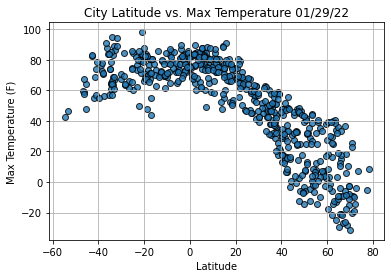

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

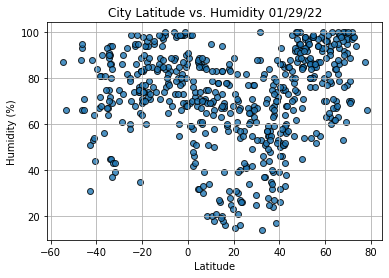

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

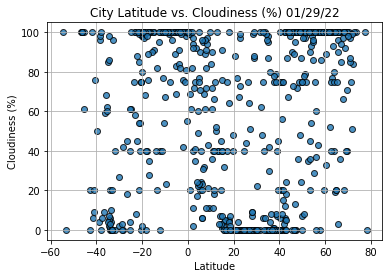

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

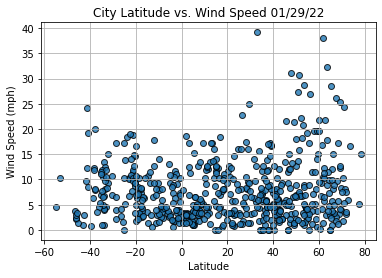

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2022-01-30 03:32:42
Lat                      -33.0153
Lng                       27.9116
Max Temp                    67.14
Humidity                       94
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
568     True
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Odweyne,SO,2022-01-30 03:34:03,9.4092,45.0640,58.87,34,11,5.23
1,Ostrovnoy,RU,2022-01-30 03:34:04,68.0531,39.5131,18.61,92,100,9.60
2,Port Blair,IN,2022-01-30 03:34:05,11.6667,92.7500,80.64,74,75,4.61
4,Strezhevoy,RU,2022-01-30 03:34:05,60.7333,77.5889,3.18,96,100,6.67
8,Dudinka,RU,2022-01-30 03:34:07,69.4058,86.1778,-2.38,95,100,12.33


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

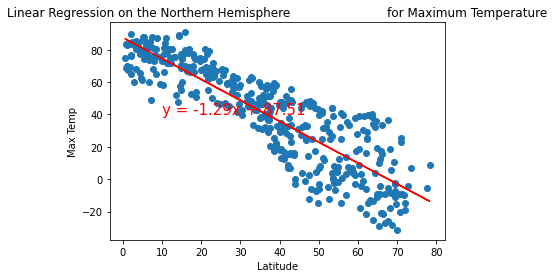

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

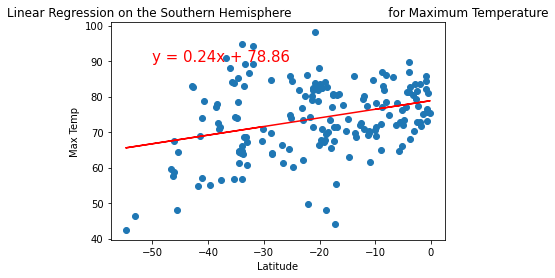

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

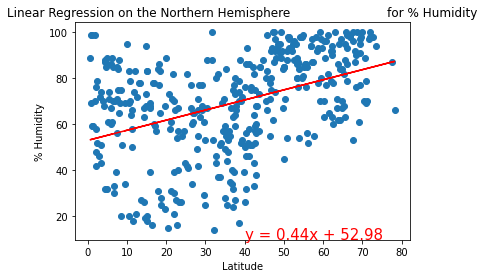

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

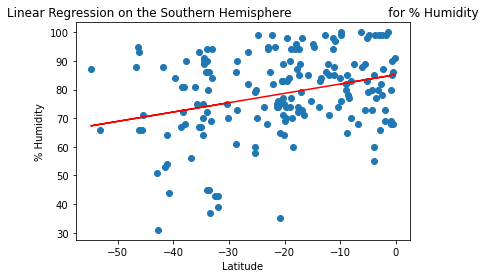

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

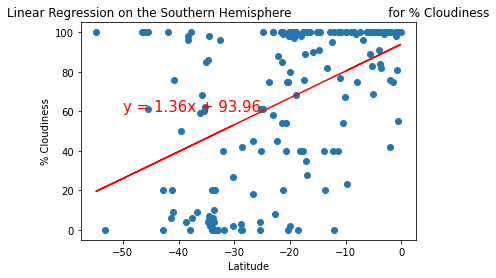

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

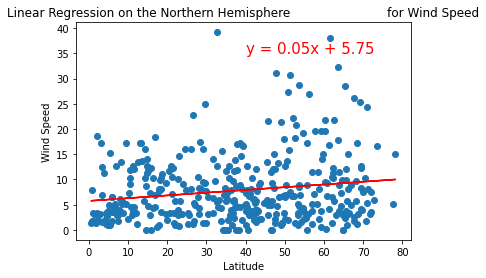

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

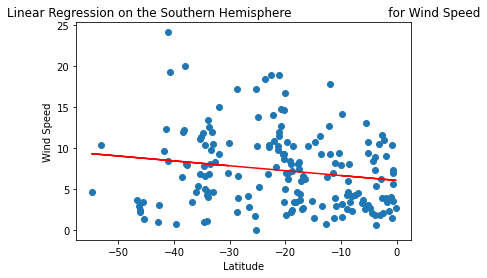

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))